In [1]:
import yfinance as yf

# Download historical data for Apple (AAPL) from Yahoo Finance
data = yf.download("AAPL", start="2010-01-01", end="2023-03-26")

# Print the first 5 rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505278  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516525  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412873  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401018  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443573  447610800


[*********************100%***********************]  1 of 1 completed


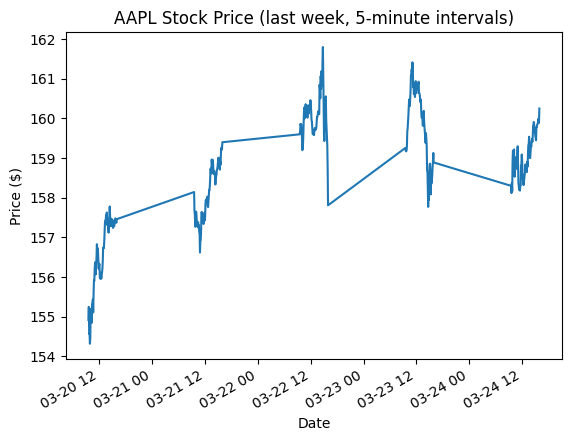

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download the data for the last week, in 5-minute intervals
data = yf.download("AAPL", period="1wk", interval="5m")

# Plot the closing price
data['Close'].plot()
plt.title('AAPL Stock Price (last week, 5-minute intervals)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Load the data
df = yf.download("AAPL", period="1wk", interval="5m")

# Preprocess the data
df['Close_diff'] = df['Close'].diff()
df = df.dropna()

# Number of lags to use. lag 
n_lags = 10

# Create lagged features
for i in range(1, n_lags+1):
    df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)


# Split the data into training and testing sets
X = df.drop(['Close', 'Close_diff'], axis=1)
y = np.where(df['Close_diff'] > 0, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fill in missing values with the mean
imp = SimpleImputer(strategy='mean')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)


# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


[*********************100%***********************]  1 of 1 completed


C:\Users\pouya\AppData\Local\Temp\ipykernel_10652\3057716327.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)
C:\Users\pouya\AppData\Local\Temp\ipykernel_10652\3057716327.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)
C:\Users\pouya\AppData\Local\Temp\ipykernel_10652\3057716327.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test set and evaluate the performance
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.51      0.50        37
           1       0.54      0.51      0.53        41

    accuracy                           0.51        78
   macro avg       0.51      0.51      0.51        78
weighted avg       0.51      0.51      0.51        78



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best score:  0.5175115207373272
